# Text classification on Emotion Training 

Text classification is the process of categorizing text into organized groups. When focusing on emotion classification, the objective is to classify a given text into predefined emotional categories such as sadness, joy, love, anger, fear, and surprise. This task is a subset of sentiment analysis but focuses more on the nuanced emotional states expressed in the text.

### Here's a structured approach to building and evaluating a text classification model for emotion detection:

Step 1: Data Preparation

Loading Data: Load the dataset containing text samples and their corresponding emotion labels.

Preprocessing: Clean and preprocess the text data. Common steps include removing stop words, punctuation, and converting text to lowercase.

Label Encoding: Convert categorical emotion labels to numerical format.

Step 2: Splitting the Data
Divide the dataset into training, validation, and test sets. A common split ratio is:

Training set: 70%
Test set: 20%
Validation set: 10%

Step 3: Balancing the Dataset
Ensure the dataset is balanced so that each emotion category has an approximately equal number of samples. This can be achieved through techniques like undersampling, oversampling, or using synthetic data generation methods such as SMOTE.

Step 4: Feature Extraction
Transform the text data into numerical features using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).

Step 5: Model Training
Train a classification model using machine learning algorithms such as Logistic Regression, Random Forest, Support Vector Machines.

Step 6: Model Evaluation
Evaluate the model using appropriate metrics such as accuracy, precision, recall, and F1-score. Confusion matrices are also useful for visualizing the performance of the model across different emotion categories.

Step 7: Hyperparameter Tuning
Optimize the model by tuning hyperparameters using techniques like grid search or randomized search.

Step 8: Final Model Selection
Compare the performance of different models and choose the one that performs best on the validation set.

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#text preprocesing
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Import the dataset

In [2]:
# Read the dataset
data = pd.read_csv('Emotions_training.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [3]:
# Display the shape of the dataset
print("\nDataset Shape:", data.shape)



Dataset Shape: (16000, 2)


In [4]:
# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None


In [5]:

# Define emotion labels
emotion_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}


# Checking dataset is balanced or imbalanced

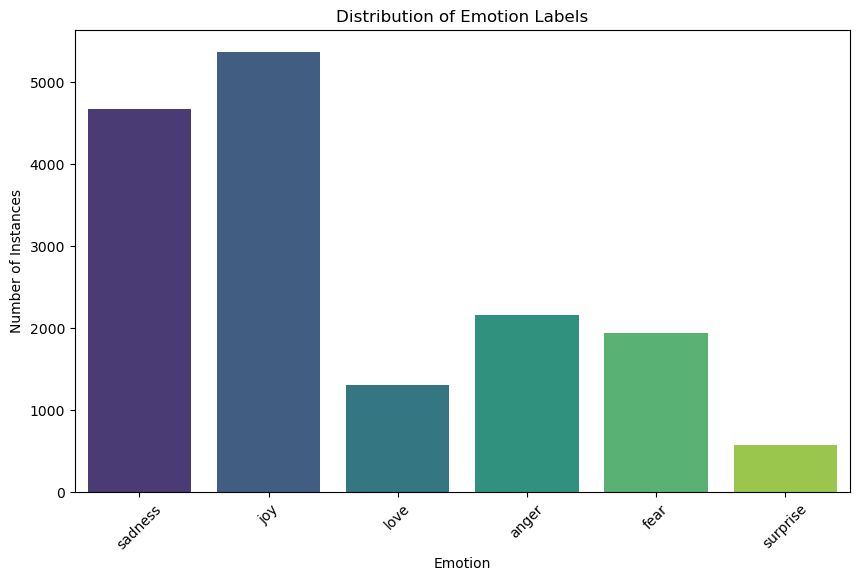

In [6]:
# Check the distribution of labels
label_counts = data['label'].value_counts().sort_index()

# Map labels to emotion names
label_counts.index = label_counts.index.map(emotion_labels)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()


The dataset is imbalanced

# Converting into Lower case

In [7]:
data['text'] = data['text'].str.lower()

# Removing the Links

In [8]:
import re
# Remove links
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Removing next lines

In [9]:
# Remove newline characters
data['text'] = data['text'].str.replace('\n', '')

# Removing words contains numbers

In [10]:
# Remove words containing numbers using regex
data['text'] = data['text'].apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))

# Removing extra spaces

In [11]:
# Remove extra spaces
data['text'] = data['text'].apply(lambda x: ' '.join(x.split()))

# Removing special characters

In [12]:
# Remove special characters
data['text'] = data['text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

# Removal of Stop words

In [13]:
from gensim.parsing.preprocessing import remove_stopwords

# Remove stop words using gensim
data['text'] = data['text'].apply(remove_stopwords)

# Stemming

In [14]:
# Initialize the Porter Stemmer
porter = PorterStemmer()

# Define function to apply stemming using NLTK Porter Stemmer
def apply_stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply stemming
data['text'] = data['text'].apply(apply_stemming)

# Lemmatization

In [15]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define function to apply lemmatization using NLTK WordNet Lemmatizer
def apply_lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization
data['text'] = data['text'].apply(apply_lemmatization)


# TF-IDF Vectorizer

TF-IDF Vectorizer: Converts text data into a numerical form that can be used by machine learning models. TF-IDF stands for Term Frequency-Inverse Document Frequency, which helps in reflecting the importance of a term in a document relative to the entire corpus.

In [16]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Split the dataset

Divide the dataset into training, validation, and test sets. A common split ratio is:

Training set: 70%

Test set: 20%

Validation set: 10%

In [17]:
# Split the data into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Further split the temp set into validation (10% of total) and test (20% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

# Check the distribution of the splits
print("Training set distribution:\n", pd.Series(y_train).value_counts())
print("\nValidation set distribution:\n", pd.Series(y_val).value_counts())
print("\nTest set distribution:\n", pd.Series(y_test).value_counts())

Training set distribution:
 label
1    3754
0    3266
3    1511
4    1356
2     913
5     400
Name: count, dtype: int64

Validation set distribution:
 label
1    536
0    467
3    216
4    194
2    130
5     57
Name: count, dtype: int64

Test set distribution:
 label
1    1072
0     933
3     432
4     387
2     261
5     115
Name: count, dtype: int64


# Balancing the dataset

Ensure the dataset is balanced so that each emotion category has an approximately equal number of samples. This can be achieved through techniques like undersampling, oversampling, or using synthetic data generation methods such as SMOTE.

SMOTE is a technique used to address class imbalance by generating synthetic samples for the minority class. 

In [18]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Fit and resample the training data to create a balanced dataset
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [19]:
# Check the distribution after balancing
balanced_label_counts = pd.Series(y_train_balanced).value_counts().sort_index()
print("\nBalanced training set distribution:\n", balanced_label_counts)


Balanced training set distribution:
 label
0    3754
1    3754
2    3754
3    3754
4    3754
5    3754
Name: count, dtype: int64


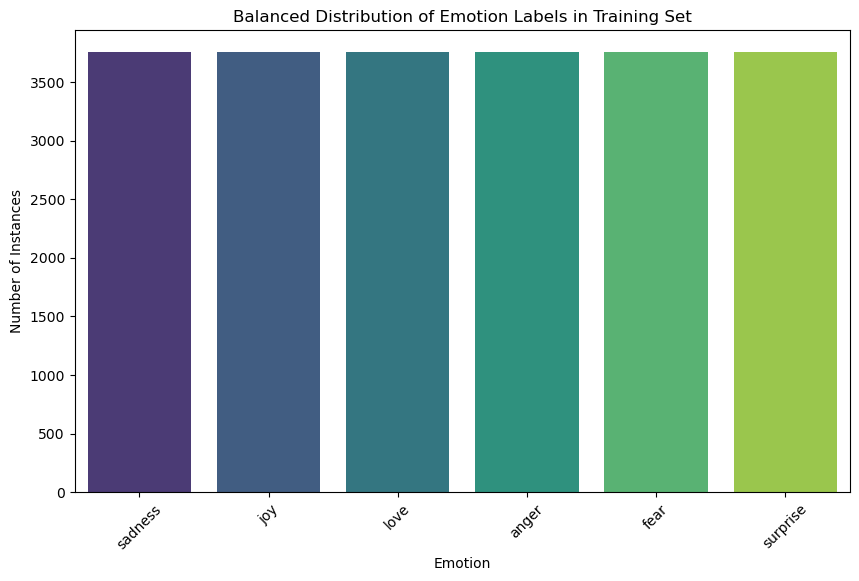

In [20]:
# Map labels to emotion names for plotting
balanced_label_counts.index = balanced_label_counts.index.map(emotion_labels)

# Plot the balanced distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=balanced_label_counts.index, y=balanced_label_counts.values, palette="viridis")
plt.title('Balanced Distribution of Emotion Labels in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have already performed data splitting and have X_train_balanced, y_train_balanced, X_test, y_test

# Build the model
model = LogisticRegression(random_state=42)

# Train the model on the balanced training data
model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the training data
y_pred_train = model.predict(X_train_balanced)

# Generate classification report for the training data
print("Classification Report - Training Set:")
print(classification_report(y_train_balanced, y_pred_train))

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Generate classification report for the test data
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_test))


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3754
           1       0.96      0.91      0.93      3754
           2       0.95      0.98      0.97      3754
           3       0.97      0.98      0.97      3754
           4       0.97      0.93      0.95      3754
           5       0.96      1.00      0.98      3754

    accuracy                           0.96     22524
   macro avg       0.96      0.96      0.96     22524
weighted avg       0.96      0.96      0.96     22524


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       933
           1       0.88      0.85      0.87      1072
           2       0.64      0.75      0.69       261
           3       0.84      0.84      0.84       432
           4       0.81      0.84      0.82       387
           5       0.73      0.78      0.75       115

    

In [22]:
# Confusion Matrices
print("\nConfusion Matrix - Training Set:")
cm_train = confusion_matrix(y_train_balanced, y_pred_train)
print(cm_train)

print("\nConfusion Matrix - Test Set:")
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)


Confusion Matrix - Training Set:
[[3532   61   24   66   49   22]
 [  67 3425  164   32   31   35]
 [   7   42 3697    2    5    1]
 [  50   17    7 3671    6    3]
 [  95   26   13   32 3480  108]
 [   1    3    1    0    3 3746]]

Confusion Matrix - Test Set:
[[808  46   9  34  31   5]
 [ 38 913  84  14  13  10]
 [  6  45 197   5   8   0]
 [ 30  14   9 365  12   2]
 [ 14   9   7  14 326  17]
 [  1   6   2   2  14  90]]


# Hyperparameter Tuning for Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have already performed data splitting and have X_train_balanced, y_train_balanced, X_test, y_test

# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [ 0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Solver options
}

In [24]:
# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1_macro')

In [25]:
# Train the model with GridSearch
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
             scoring='f1_macro')

In [26]:
# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

In [27]:
# Make predictions on the training and test data using the best model
y_pred_train = best_model.predict(X_train_balanced)
y_pred_test = best_model.predict(X_test)

In [28]:
# Generate classification reports
print("Classification Report - Training Set (Best Model):")
print(classification_report(y_train_balanced, y_pred_train))

Classification Report - Training Set (Best Model):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3754
           1       0.99      0.97      0.98      3754
           2       0.98      1.00      0.99      3754
           3       0.99      0.99      0.99      3754
           4       0.99      0.98      0.98      3754
           5       0.98      1.00      0.99      3754

    accuracy                           0.99     22524
   macro avg       0.99      0.99      0.99     22524
weighted avg       0.99      0.99      0.99     22524



In [29]:
print("\nClassification Report - Test Set (Best Model):")
print(classification_report(y_test, y_pred_test))

# Print the best hyperparameters
print("\nBest Hyperparameters:", grid_search.best_params_)


Classification Report - Test Set (Best Model):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       933
           1       0.86      0.85      0.86      1072
           2       0.62      0.67      0.65       261
           3       0.83      0.84      0.84       432
           4       0.78      0.82      0.80       387
           5       0.74      0.73      0.73       115

    accuracy                           0.83      3200
   macro avg       0.79      0.79      0.79      3200
weighted avg       0.83      0.83      0.83      3200


Best Hyperparameters: {'C': 10, 'solver': 'lbfgs'}


In [30]:
# Confusion Matrices
print("\nConfusion Matrix - Training Set:")
cm_train = confusion_matrix(y_train_balanced, y_pred_train)
print(cm_train)

print("\nConfusion Matrix - Test Set:")
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)


Confusion Matrix - Training Set:
[[3685   16    3   30   15    5]
 [  27 3626   68    7   12   14]
 [   1   16 3736    0    1    0]
 [  13    3    1 3733    4    0]
 [   9    2    2   17 3669   55]
 [   0    0    0    0    1 3753]]

Confusion Matrix - Test Set:
[[799  44  13  40  32   5]
 [ 44 914  79  11  16   8]
 [ 11  62 175   5   7   1]
 [ 33  13   7 362  17   0]
 [ 18  16   5  14 318  16]
 [  2   8   1   2  18  84]]


# Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you already have performed data splitting and have X_train_balanced, y_train_balanced, X_test, y_test

# Build the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Train the model on the balanced training data
model_rf.fit(X_train_balanced, y_train_balanced)

# Make predictions on the training data
y_pred_train_rf = model_rf.predict(X_train_balanced)

# Generate classification report for the training data (Random Forest)
print("\nClassification Report - Training Set (Random Forest):")
print(classification_report(y_train_balanced, y_pred_train_rf))

# Make predictions on the test data
y_pred_test_rf = model_rf.predict(X_test)

# Generate classification report for the test data (Random Forest)
print("\nClassification Report - Test Set (Random Forest):")
print(classification_report(y_test, y_pred_test_rf))



Classification Report - Training Set (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3754
           1       1.00      1.00      1.00      3754
           2       1.00      1.00      1.00      3754
           3       1.00      1.00      1.00      3754
           4       1.00      1.00      1.00      3754
           5       1.00      1.00      1.00      3754

    accuracy                           1.00     22524
   macro avg       1.00      1.00      1.00     22524
weighted avg       1.00      1.00      1.00     22524


Classification Report - Test Set (Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       933
           1       0.89      0.81      0.85      1072
           2       0.60      0.78      0.68       261
           3       0.82      0.86      0.84       432
           4       0.78      0.87      0.83       387
           5       0.67   

In [32]:
# Confusion Matrices
print("\nConfusion Matrix - Training Set (Random Forest):")
cm_train_rf = confusion_matrix(y_train_balanced, y_pred_train_rf)
print(cm_train_rf)

print("\nConfusion Matrix - Test Set (Random Forest):")
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)
print(cm_test_rf)


Confusion Matrix - Training Set (Random Forest):
[[3745    0    0    8    1    0]
 [   2 3744    7    0    0    1]
 [   0    1 3753    0    0    0]
 [   1    0    0 3752    1    0]
 [   2    0    0    3 3740    9]
 [   0    0    0    0    0 3754]]

Confusion Matrix - Test Set (Random Forest):
[[777  50  25  40  34   7]
 [ 42 873  95  24  22  16]
 [  1  44 203   4   7   2]
 [ 23  10   9 373  14   3]
 [ 10   4   3  13 338  19]
 [  0   0   3   0  16  96]]


# Hyperparameter Tuning For Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming you already performed data splitting and have X_train_balanced, y_train_balanced, X_test, y_test

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

In [34]:
# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')

In [35]:
# Train the model with GridSearch
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='f1_macro')

In [36]:
# Get the best model with tuned hyperparameters
best_model_rf = grid_search.best_estimator_

In [37]:
# Make predictions on the training and test data using the best model
y_pred_train_rf = best_model_rf.predict(X_train_balanced)
y_pred_test_rf = best_model_rf.predict(X_test)

In [38]:
# Generate classification reports
print("Classification Report - Training Set (Random Forest):")
print(classification_report(y_train_balanced, y_pred_train_rf))

Classification Report - Training Set (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3754
           1       1.00      1.00      1.00      3754
           2       1.00      1.00      1.00      3754
           3       1.00      1.00      1.00      3754
           4       1.00      1.00      1.00      3754
           5       1.00      1.00      1.00      3754

    accuracy                           1.00     22524
   macro avg       1.00      1.00      1.00     22524
weighted avg       1.00      1.00      1.00     22524



In [39]:
print("\nClassification Report - Test Set (Random Forest):")
print(classification_report(y_test, y_pred_test_rf))

# Print the best hyperparameters
print("\nBest Hyperparameters (Random Forest):", grid_search.best_params_)


Classification Report - Test Set (Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       933
           1       0.89      0.81      0.85      1072
           2       0.60      0.78      0.68       261
           3       0.82      0.86      0.84       432
           4       0.78      0.87      0.83       387
           5       0.67      0.83      0.74       115

    accuracy                           0.83      3200
   macro avg       0.78      0.83      0.80      3200
weighted avg       0.84      0.83      0.83      3200


Best Hyperparameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
# Confusion Matrices
print("\nConfusion Matrix - Training Set:")
cm_train = confusion_matrix(y_train_balanced, y_pred_train_rf)
print(cm_train)

print("\nConfusion Matrix - Test Set:")
cm_test = confusion_matrix(y_test, y_pred_test_rf)
print(cm_test)


Confusion Matrix - Training Set:
[[3745    0    0    8    1    0]
 [   2 3744    7    0    0    1]
 [   0    1 3753    0    0    0]
 [   1    0    0 3752    1    0]
 [   2    0    0    3 3740    9]
 [   0    0    0    0    0 3754]]

Confusion Matrix - Test Set:
[[777  50  25  40  34   7]
 [ 42 873  95  24  22  16]
 [  1  44 203   4   7   2]
 [ 23  10   9 373  14   3]
 [ 10   4   3  13 338  19]
 [  0   0   3   0  16  96]]


# Support Vector Machine

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you already performed data splitting and have X_train_balanced, y_train_balanced, X_test, y_test

# Build SVM model
model_svm = SVC(random_state=42)  # Set random state for reproducibility

# Train the model on balanced training data
model_svm.fit(X_train_balanced, y_train_balanced)

# Make predictions on training and test data
y_pred_train_svm = model_svm.predict(X_train_balanced)
y_pred_test_svm = model_svm.predict(X_test)

# Generate classification reports
print("Classification Report (SVM) - Training Set:")
print(classification_report(y_train_balanced, y_pred_train_svm))

print("\nClassification Report (SVM) - Test Set:")
print(classification_report(y_test, y_pred_test_svm))

# Calculate and print confusion matrices
print("\nConfusion Matrix (SVM) - Training Set:")
cm_train_svm = confusion_matrix(y_train_balanced, y_pred_train_svm)
print(cm_train_svm)

print("\nConfusion Matrix (SVM) - Test Set:")
cm_test_svm = confusion_matrix(y_test, y_pred_test_svm)
print(cm_test_svm)


Classification Report (SVM) - Training Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3754
           1       1.00      0.99      0.99      3754
           2       1.00      1.00      1.00      3754
           3       0.99      1.00      1.00      3754
           4       0.98      0.98      0.98      3754
           5       0.98      1.00      0.99      3754

    accuracy                           0.99     22524
   macro avg       0.99      0.99      0.99     22524
weighted avg       0.99      0.99      0.99     22524


Classification Report (SVM) - Test Set:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       933
           1       0.77      0.92      0.84      1072
           2       0.77      0.49      0.59       261
           3       0.87      0.77      0.82       432
           4       0.82      0.75      0.78       387
           5       0.80      0.49      0.61    

# Hyperparameter Tuning for Support Vector Machine

In [42]:
from sklearn.svm import SVC
# Assuming you already performed data splitting and have X_train_balanced, y_train_balanced, X_test, y_test

# Hyperparameter grids for Logistic Regression and SVM
# Use at least 2 values for each hyperparameter
svm_param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'kernel': ['linear', 'rbf']  # Kernel types for SVM
}


In [43]:
# SVM model with GridSearchCV
model_svm = SVC(random_state=42)
grid_svm = GridSearchCV(model_svm, svm_param_grid, cv=5, scoring='f1_macro')
grid_svm.fit(X_train_balanced, y_train_balanced)


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='f1_macro')

In [47]:
# Best parameters for SVM
best_params_svm = grid_svm.best_params_

In [45]:
# Make predictions and evaluate using best parameters
model_svm_tuned = SVC(random_state=42, **best_params_svm)
model_svm_tuned.fit(X_train_balanced, y_train_balanced)

SVC(C=10, kernel='linear', random_state=42)

In [46]:
y_pred_train_svm = model_svm_tuned.predict(X_train_balanced)
y_pred_test_svm = model_svm_tuned.predict(X_test)

In [48]:
# Classification report and confusion matrix for SVM
print("\nSupport Vector Machine (GridSearchCV):")
print("Classification Report - Training Set:")
print(classification_report(y_train_balanced, y_pred_train_svm))
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_test_svm))


Support Vector Machine (GridSearchCV):
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3754
           1       1.00      0.99      0.99      3754
           2       0.99      1.00      1.00      3754
           3       0.99      1.00      0.99      3754
           4       0.98      0.98      0.98      3754
           5       0.98      1.00      0.99      3754

    accuracy                           0.99     22524
   macro avg       0.99      0.99      0.99     22524
weighted avg       0.99      0.99      0.99     22524


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       933
           1       0.82      0.83      0.82      1072
           2       0.68      0.60      0.64       261
           3       0.84      0.75      0.79       432
           4       0.76      0.80      0.78       387
           5       

In [49]:
print("\nConfusion Matrix - Training Set:")
cm_train_svm = confusion_matrix(y_train_balanced, y_pred_train_svm)
print(cm_train_svm)

print("\nConfusion Matrix - Test Set:")
cm_test_svm = confusion_matrix(y_test, y_pred_test_svm)
print(cm_test_svm)


Confusion Matrix - Training Set:
[[3666   10    0   21   57    0]
 [  13 3699   29    2    5    6]
 [   0    3 3751    0    0    0]
 [   6    0    0 3746    2    0]
 [   3    0    0    9 3688   54]
 [   0    0    0    0    0 3754]]

Confusion Matrix - Test Set:
[[795  60   8  34  31   5]
 [ 91 886  56   9  26   4]
 [ 24  73 156   3   5   0]
 [ 60  26   6 324  16   0]
 [ 29  19   4  16 309  10]
 [ 12  12   0   1  17  73]]


In [51]:
from sklearn.metrics import accuracy_score

# Calculate training accuracy for Logistic Regression
train_accuracy_lr = accuracy_score(y_train_balanced, y_pred_train)

# Calculate testing accuracy for Logistic Regression
test_accuracy_lr = accuracy_score(y_test, y_pred_test)

print("Logistic Regression:")
print("Training Accuracy:", train_accuracy_lr)
print("Testing Accuracy:", test_accuracy_lr)


Logistic Regression:
Training Accuracy: 0.9857041378085598
Testing Accuracy: 0.82875


In [52]:
# Calculate training accuracy for Random Forest
train_accuracy_rf = accuracy_score(y_train_balanced, y_pred_train_rf)

# Calculate testing accuracy for Random Forest
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

print("Random Forest:")
print("Training Accuracy:", train_accuracy_rf)
print("Testing Accuracy:", test_accuracy_rf)


Random Forest:
Training Accuracy: 0.9984017048481619
Testing Accuracy: 0.83125


In [53]:
# Calculate training accuracy for SVM
train_accuracy_svm = accuracy_score(y_train_balanced, y_pred_train_svm)

# Calculate testing accuracy for SVM
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

print("Support Vector Machine (SVM):")
print("Training Accuracy:", train_accuracy_svm)
print("Testing Accuracy:", test_accuracy_svm)


Support Vector Machine (SVM):
Training Accuracy: 0.9902326407387675
Testing Accuracy: 0.7946875


In [54]:
print(f"Logistic Regression: Training Accuracy: {train_accuracy_lr:.2f}, Testing Accuracy: {test_accuracy_lr:.2f}")
print(f"Random Forest: Training Accuracy: {train_accuracy_rf:.2f}, Testing Accuracy: {test_accuracy_rf:.2f}")
print(f"Support Vector Machine (SVM): Training Accuracy: {train_accuracy_svm:.2f}, Testing Accuracy: {test_accuracy_svm:.2f}")


Logistic Regression: Training Accuracy: 0.99, Testing Accuracy: 0.83
Random Forest: Training Accuracy: 1.00, Testing Accuracy: 0.83
Support Vector Machine (SVM): Training Accuracy: 0.99, Testing Accuracy: 0.79


In [55]:
# Create a dictionary to store accuracies for each model
accuracy_dict = {
    "Logistic Regression": (train_accuracy_lr, test_accuracy_lr),
    "Random Forest": (train_accuracy_rf, test_accuracy_rf),
    "Support Vector Machine (SVM)": (train_accuracy_svm, test_accuracy_svm)
}

# Find the model with the highest testing accuracy
best_model_name = max(accuracy_dict, key=lambda x: accuracy_dict[x][1])
best_model_train_accuracy, best_model_test_accuracy = accuracy_dict[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Training Accuracy: {best_model_train_accuracy:.2f}")
print(f"Testing Accuracy: {best_model_test_accuracy:.2f}")


Best Model: Random Forest
Training Accuracy: 1.00
Testing Accuracy: 0.83


In [60]:
# Evaluate the model on the validation set
val_accuracy_rf = accuracy_score(y_val, grid_search.predict(X_val))

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, grid_search.predict(X_test))

print("Random Forest Model")
print(f"Validation Accuracy: {val_accuracy_rf:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Random Forest Model
Validation Accuracy: 0.83
Test Accuracy: 0.83


# Conclusion

Based on the evaluation results, the Random Forest model shows promise as a reliable classifier for the given dataset.